# prepare data

In [2]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 
                34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 
                650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

* 데이터 분포 확인

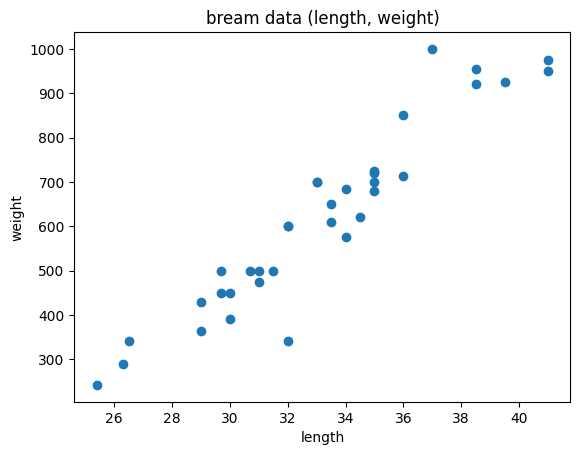

In [9]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.title('bream data (length, weight)')
plt.show()

In [10]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

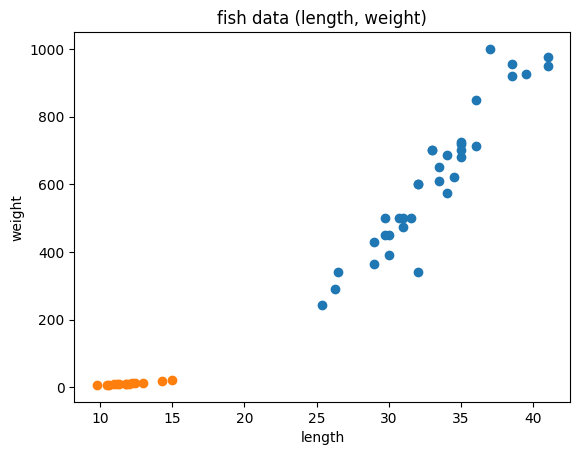

In [29]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.title('fish data (length, weight)')
plt.show()

* 두 list를 더하면 순서대로 합쳐지는 것을 확인할 수 있다.

In [13]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

* list 내포를 통해, 간단하게 데이터를 압축할 수 있다

In [16]:
fish_data = [[i, w] for i, w in zip(length, weight)]

* fish의 정답

In [20]:
fish_target = [1]*35 + [0]*14

### k-최근접 이웃
* 샘플의 주위에 있는 클래스를 확인
    * 기본적으로 5개의 샘플을 확인한다.
    * 예측 시, 주변에 정해진 샘플 갯수를 토대로 확인한 후, 더 많은 클래스로 예측

In [24]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

In [25]:
kn.predict([[30, 600]])

array([1])

* 전체 데이터 개수가 49개이므로, 49개를 이웃으로 지정
  * 이렇게 되면, 전체 샘플의 다수는 도미이기 때문에 이렇게 만들면 도미랑 가깝다.
  * 즉 모든 예측을 도미로 하게 된다.

In [27]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [28]:
print(35/49)

0.7142857142857143
